In [432]:
%pip install statsmodels

21710.40s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 14.1 MB/s eta 0:00:000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.9/233.9 kB 9.9 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [308]:
from pathlib import Path
import pandas as pd
import plotly.express as px
import plotly.graph_objs as go
import plotly.io as pio
import plotly.colors
import numpy as np
import scipy
import sklearn.decomposition
import copy

In [309]:
pio.templates["matplotlib"] = copy.deepcopy(pio.templates["plotly_white"])
pio.templates.default = "matplotlib"
pio.templates["matplotlib"]["layout"]["xaxis"]["showline"] = True
pio.templates["matplotlib"]["layout"]["xaxis"]["linecolor"] = "black"
pio.templates["matplotlib"]["layout"]["yaxis"]["showline"] = True
pio.templates["matplotlib"]["layout"]["yaxis"]["linecolor"] = "black"
pio.templates["matplotlib"]["layout"]["colorway"] = plotly.colors.qualitative.T10

In [310]:
csv_files = {x.stem: x for x in (Path("../data").glob("*.csv"))}

In [311]:
all_results_df = pd.read_csv(csv_files["all_results"])
all_results_df.columns

Index(['model', 'num_param', 'memT', 'memR', 'memA', 'memM', 'energy', 'co2',
       'train_time', 'infer_time', 'test_00', 'inf_time', 'tr_acc', 'test_01',
       'test_02', 'test_03', 'test_04', 'test_05', 'test_06', 'test_07',
       'test_08', 'test_09', 'pretrain', 'type', 'efficient', 'dataset', 'pen',
       'conv_idx', 'best_test', 'energy_conv', 'time_conv', 'co2_conv', 'E_n',
       'pepr_e', 'C_n', 'pepr_c', 'T_n', 'pepr_t', 'pepr_m'],
      dtype='object')

In [312]:
all_results_df["dataset"].unique().tolist()

['derma_pt',
 'lidc',
 'lidc_small',
 'derma',
 'derma_small',
 'derma_smallest',
 'pneumonia',
 'pneumonia_small']

In [411]:
# dataset_prefix = "derma"
# idx = (all_results_df["dataset"] == "derma") | (all_results_df["dataset"] == "derma_pt")
# idx = (all_results_df["dataset"] == "derma_small")
dataset_prefix = "derma"
# dataset_prefix = "lidc"
# dataset_prefix = "pneumonia"
# idx = (all_results_df["dataset"] == f"{dataset_prefix}_small") | (all_results_df["dataset"] == f"{dataset_prefix}")
idx = (all_results_df["dataset"] == f"{dataset_prefix}")
# dataset_prefix = "all_large"
# idx = (all_results_df["dataset"] == f"derma_pt") | (all_results_df["dataset"] == f"lidc") | (all_results_df["dataset"] == f"pneumonia")
# idx = (all_results_df["dataset"] == "derma_small") | (all_results_df["dataset"] == "derma")
# idx = (all_results_df["dataset"] == "pneumonia_small") | (all_results_df["dataset"] == "pneumonia")
df = pd.DataFrame(all_results_df[idx])
df = df.sort_values(["dataset", "num_param"])
df["label"] = [f"{x.model} {x.dataset}" for x in df.itertuples()]
df

,model,num_param,memT,memR,memA,memM,energy,co2,train_time,infer_time,...,time_conv,co2_conv,E_n,pepr_e,C_n,pepr_c,T_n,pepr_t,pepr_m,label
393,dla46x_c,1068440,25.435111,3.001025,0.038321,2.267537,0.018471,0.969729,11.889799,0,...,1.321089,0.107748,0.007864,0.726144,0.004956,0.728246,0.009126,0.725236,0.685726,dla46x_c derma
394,dla46_c,1301400,25.435111,2.520777,0.042073,1.882373,0.016436,1.536767,10.464308,0,...,2.092862,0.307353,0.012722,0.708228,0.014531,0.706965,0.014694,0.706851,0.686539,dla46_c derma
395,mobilevitv2_050,1370593,25.435111,3.091202,0.060189,2.885807,0.015261,1.434517,9.933567,0,...,3.311189,0.478172,0.019801,0.693921,0.022726,0.691937,0.023484,0.691424,0.660436,mobilevitv2_050 derma
396,mobilenetv2_050,1968680,25.435111,2.227175,0.053616,1.934997,0.010583,1.010668,7.320693,0,...,0.732069,0.101067,0.003954,0.681780,0.004636,0.681317,0.004876,0.681154,0.663942,mobilenetv2_050 derma
397,semnasnet_075,2912278,25.435111,2.791309,0.068774,2.116848,0.014516,1.386263,9.723404,0,...,1.215425,0.173283,0.006929,0.703793,0.008100,0.702975,0.008364,0.702792,0.670186,semnasnet_075 derma
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
519,ecaresnet269d,102093077,25.435111,19.860029,1.667829,19.072327,0.173975,9.177201,105.954078,0,...,11.772675,1.019689,0.075830,0.683550,0.048703,0.701231,0.084533,0.678064,0.395568,ecaresnet269d derma
520,legacy_senet154,115088984,25.435111,18.150851,1.861255,16.598430,0.184867,9.566861,112.701546,0,...,11.270155,0.956686,0.072510,0.698354,0.045680,0.716272,0.080907,0.692929,0.421069,legacy_senet154 derma
521,resnetrs270,129861448,25.435111,20.963131,2.113233,20.127319,0.180650,9.393810,110.042049,0,...,11.004205,0.939381,0.070852,0.697082,0.044850,0.714429,0.078988,0.691826,0.390646,resnetrs270 derma
522,vgg11,132863336,25.435111,6.343885,2.105292,4.500173,0.046186,2.447834,29.097516,0,...,2.909752,0.244783,0.017959,0.702109,0.011530,0.706571,0.020588,0.700300,0.583792,vgg11 derma


In [412]:
df["test_profile"] = df[[f"test_{i:02d}" for i in range(10)]].values.tolist()

In [413]:
test_profile = np.array(df["test_profile"].tolist())

In [414]:
peak_profile = np.zeros_like(test_profile)
peak_profile[:, 0] = test_profile[:, 0]
for i in range(1, peak_profile.shape[-1]):
    peak_profile[:, i] = np.maximum(peak_profile[:, i-1], test_profile[:, i])
peak_profile

array([[0.66129032, 0.66129032, 0.66280242, ..., 0.72278226, 0.73185484,
        0.73185484],
       [0.59828629, 0.66733871, 0.66733871, ..., 0.7172379 , 0.7172379 ,
        0.7172379 ],
       [0.66481855, 0.69707661, 0.70766129, ..., 0.70766129, 0.70766129,
        0.70766129],
       ...,
       [0.67842742, 0.68397177, 0.69052419, ..., 0.73891129, 0.74344758,
        0.74647177],
       [0.66935484, 0.67590726, 0.68649194, ..., 0.71270161, 0.71270161,
        0.71471774],
       [0.66885081, 0.67086694, 0.67540323, ..., 0.70362903, 0.70362903,
        0.70362903]])

In [415]:
df["peak_test"] = peak_profile[:, -1]

In [416]:
df[["peak_test", "best_test"]]

,peak_test,best_test
393,0.731855,0.731855
394,0.717238,0.717238
395,0.707661,0.707661
396,0.684476,0.684476
397,0.708669,0.708669
...,...,...
519,0.735383,0.735383
520,0.748992,0.748992
521,0.746472,0.746472
522,0.714718,0.714718


In [417]:
dataset_max_test = df.groupby("dataset")[["peak_test"]].max().rename(columns={"peak_test": "dataset_peak_test"}).reset_index()
dataset_max_test

,dataset,dataset_peak_test
0,derma,0.771169


In [418]:
df["dataset_peak_test"] = pd.merge(df[["dataset"]], dataset_max_test, on="dataset", how="left")["dataset_peak_test"].values
df

,model,num_param,memT,memR,memA,memM,energy,co2,train_time,infer_time,...,pepr_e,C_n,pepr_c,T_n,pepr_t,pepr_m,label,test_profile,peak_test,dataset_peak_test
393,dla46x_c,1068440,25.435111,3.001025,0.038321,2.267537,0.018471,0.969729,11.889799,0,...,0.726144,0.004956,0.728246,0.009126,0.725236,0.685726,dla46x_c derma,"[0.6612903225806451, 0.6285282258064516, 0.662...",0.731855,0.771169
394,dla46_c,1301400,25.435111,2.520777,0.042073,1.882373,0.016436,1.536767,10.464308,0,...,0.708228,0.014531,0.706965,0.014694,0.706851,0.686539,dla46_c derma,"[0.5982862903225806, 0.6673387096774194, 0.657...",0.717238,0.771169
395,mobilevitv2_050,1370593,25.435111,3.091202,0.060189,2.885807,0.015261,1.434517,9.933567,0,...,0.693921,0.022726,0.691937,0.023484,0.691424,0.660436,mobilevitv2_050 derma,"[0.6648185483870968, 0.6970766129032258, 0.707...",0.707661,0.771169
396,mobilenetv2_050,1968680,25.435111,2.227175,0.053616,1.934997,0.010583,1.010668,7.320693,0,...,0.681780,0.004636,0.681317,0.004876,0.681154,0.663942,mobilenetv2_050 derma,"[0.6723790322580645, 0.6512096774193549, 0.669...",0.684476,0.771169
397,semnasnet_075,2912278,25.435111,2.791309,0.068774,2.116848,0.014516,1.386263,9.723404,0,...,0.703793,0.008100,0.702975,0.008364,0.702792,0.670186,semnasnet_075 derma,"[0.655241935483871, 0.6844758064516129, 0.6915...",0.708669,0.771169
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
519,ecaresnet269d,102093077,25.435111,19.860029,1.667829,19.072327,0.173975,9.177201,105.954078,0,...,0.683550,0.048703,0.701231,0.084533,0.678064,0.395568,ecaresnet269d derma,"[0.6769153225806451, 0.686491935483871, 0.7036...",0.735383,0.771169
520,legacy_senet154,115088984,25.435111,18.150851,1.861255,16.598430,0.184867,9.566861,112.701546,0,...,0.698354,0.045680,0.716272,0.080907,0.692929,0.421069,legacy_senet154 derma,"[0.6723790322580645, 0.6844758064516129, 0.690...",0.748992,0.771169
521,resnetrs270,129861448,25.435111,20.963131,2.113233,20.127319,0.180650,9.393810,110.042049,0,...,0.697082,0.044850,0.714429,0.078988,0.691826,0.390646,resnetrs270 derma,"[0.6784274193548387, 0.6839717741935484, 0.690...",0.746472,0.771169
522,vgg11,132863336,25.435111,6.343885,2.105292,4.500173,0.046186,2.447834,29.097516,0,...,0.702109,0.011530,0.706571,0.020588,0.700300,0.583792,vgg11 derma,"[0.6693548387096774, 0.6759072580645161, 0.686...",0.714718,0.771169


/Users/bob/venv/python3.11/lib/python3.11/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



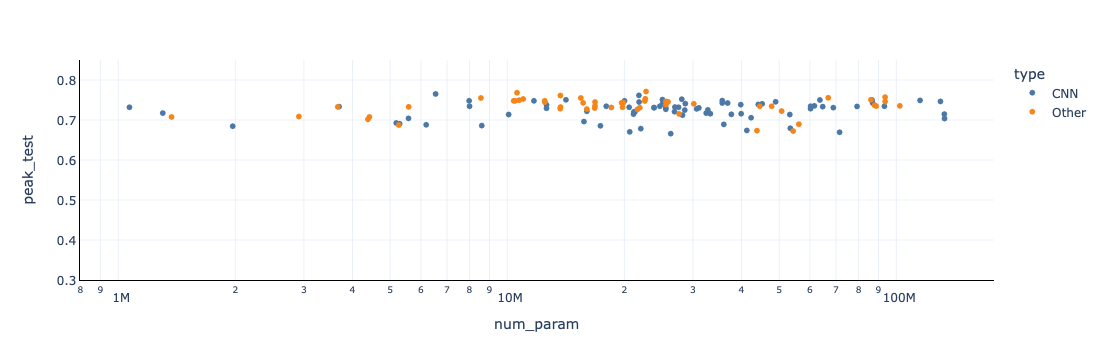

In [419]:
# grouped_df = df.groupby("model")[["peak_test", "num_param"]].mean()
df["relative_peak_test"] = df["peak_test"] / df["dataset_peak_test"]
grouped_df = df.groupby("model").agg({"peak_test": "mean", "relative_peak_test": "mean", "num_param": "mean", "label": "max", "energy": "max", "type": "max"})
px.scatter(grouped_df, x="num_param", y="peak_test", hover_name="label", range_y=[0.3, 0.85], color="type", log_x=True)


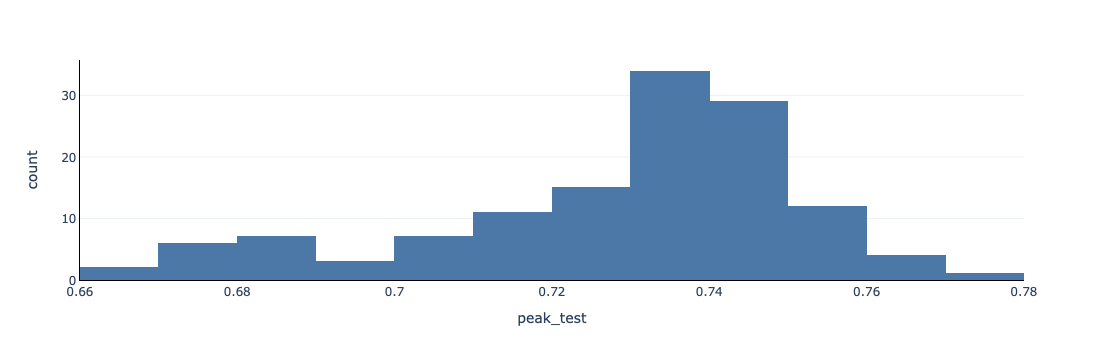

In [421]:
px.histogram(grouped_df, x="peak_test", nbins=16)

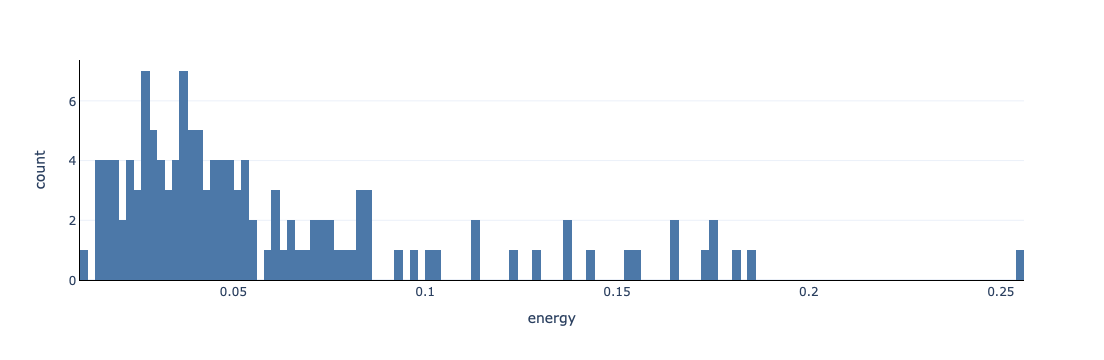

In [422]:
px.histogram(df, x="energy", nbins=2**7)

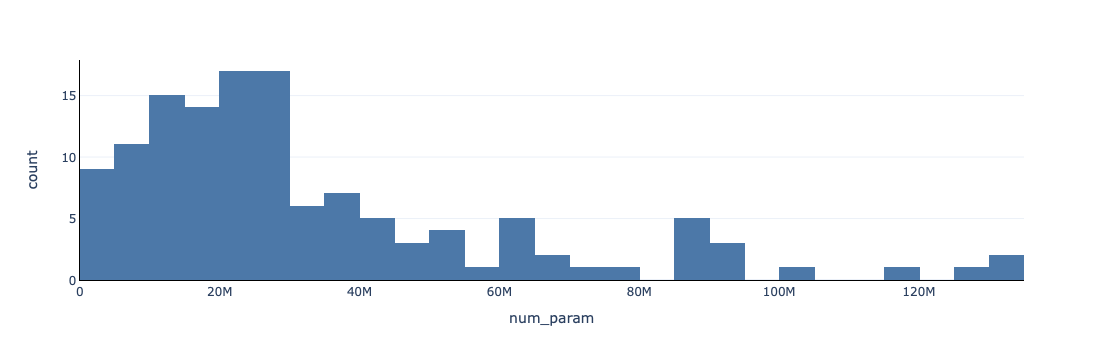

In [423]:
px.histogram(df, x="num_param", nbins=2**6)

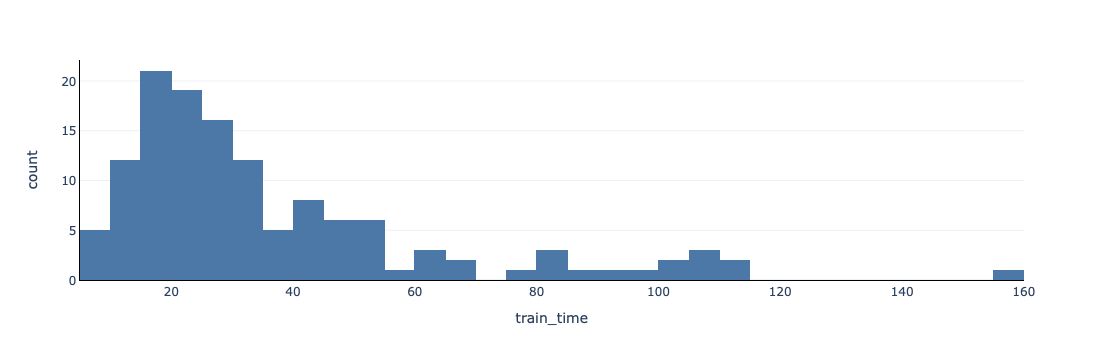

In [424]:
px.histogram(df, x="train_time", nbins=2**6)

In [668]:
resource_column = "energy"
resource_df = pd.DataFrame(df)
# ressource_column = "energy"
resource_per_epoch = (resource_df[resource_column].values / 10).reshape(-1, 1)
epoch_time = resource_per_epoch * np.arange(10).reshape(1, -1)
np.max(epoch_time)

0.2297426279004

In [669]:
sample_times = np.linspace(0, np.max(epoch_time), 2**10)
peak_profile_time = np.zeros((peak_profile.shape[0], sample_times.shape[0]))
for i in range(0, peak_profile.shape[0]):
    peak_profile_time[i] = np.interp(sample_times, epoch_time[i], peak_profile[i])
peak_profile_time

array([[0.66129032, 0.66129032, 0.66129032, ..., 0.73185484, 0.73185484,
        0.73185484],
       [0.59828629, 0.60772143, 0.61715657, ..., 0.7172379 , 0.7172379 ,
        0.7172379 ],
       [0.66481855, 0.66956563, 0.6743127 , ..., 0.70766129, 0.70766129,
        0.70766129],
       ...,
       [0.67842742, 0.67849634, 0.67856527, ..., 0.74647177, 0.74647177,
        0.74647177],
       [0.66935484, 0.66967345, 0.66999206, ..., 0.71471774, 0.71471774,
        0.71471774],
       [0.66885081, 0.66892191, 0.66899302, ..., 0.70362903, 0.70362903,
        0.70362903]])

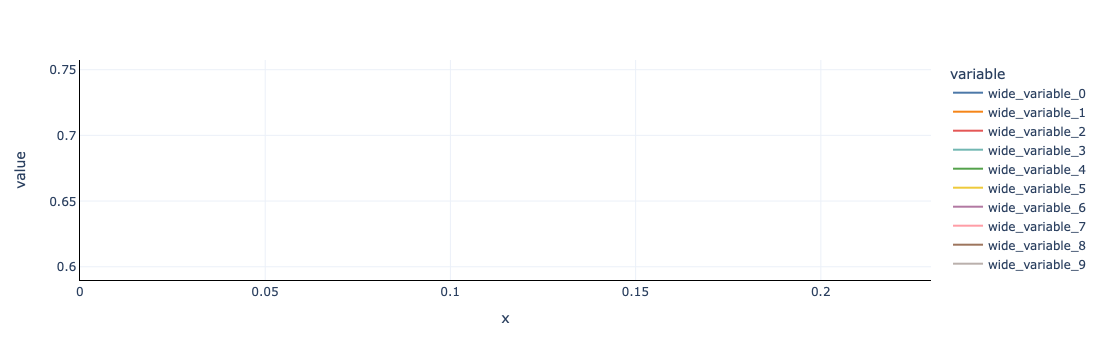

In [670]:
px.line(x=sample_times, y=peak_profile_time[:5].tolist() + peak_profile_time[-5:].tolist())

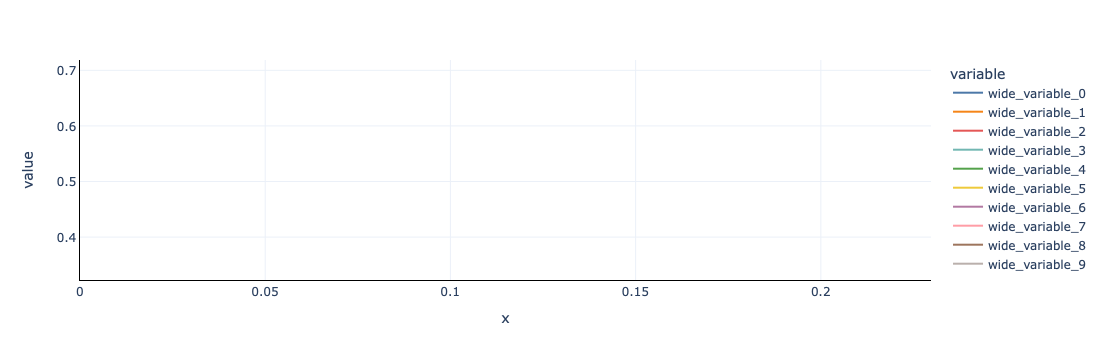

In [671]:
sample_timestep = sample_times[1] - sample_times[0]
normalized_sample_times = (sample_times - sample_timestep) / (np.max(epoch_time) + sample_timestep)
pepr = peak_profile_time / (1+normalized_sample_times)
px.line(x=sample_times, y=pepr[:5].tolist() + pepr[-5:].tolist())

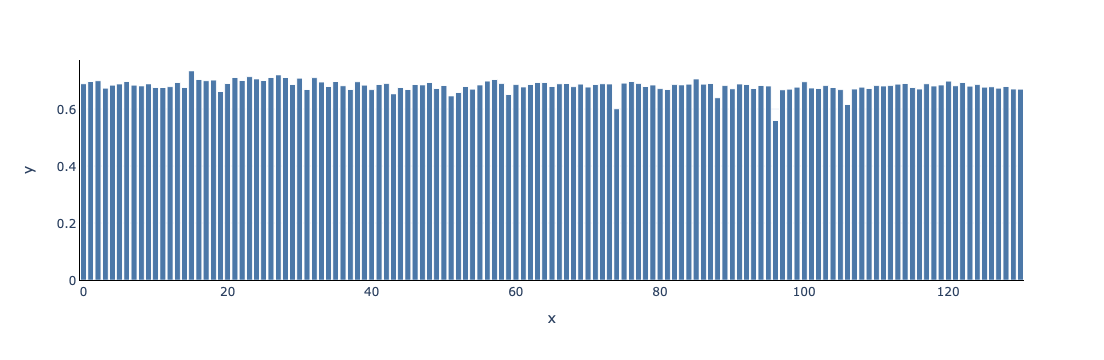

In [672]:
idx = np.argmax(pepr, axis=-1)
r_star = sample_times[idx]
pepr_star = np.array([pepr[i, k] for i, k in enumerate(idx)])
labels = [f"{x.model} {x.dataset}" for x in df.itertuples()]
resource_df["pepr_star"] = pepr_star
px.bar(y=pepr_star, hover_name=labels)
# r_star, pepr_star

/Users/bob/venv/python3.11/lib/python3.11/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



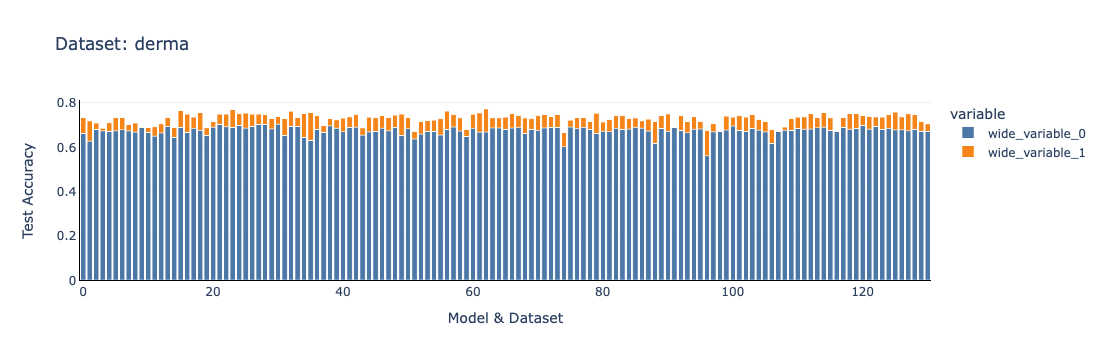

In [673]:
base_idx = 3
labels = [f"{x.model} {x.dataset}" for x in df.itertuples()]
px.bar(y=[peak_profile_time[:, base_idx], peak_profile_time[:, -1]-peak_profile_time[:, base_idx]], 
       hover_name=labels, labels={"index": "Model & Dataset", "value": "Test Accuracy"}, title=f"Dataset: {dataset_prefix}")

In [676]:
stratify_column = "num_param"
quantile_p = np.linspace(0, 1, 6)
quantiles = np.quantile(df[stratify_column].values, quantile_p)
quantiles[-1] += 1e-6
quantile_p, quantiles

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 array([1.06844000e+06, 1.17087440e+07, 2.11102480e+07, 2.76421840e+07,
        5.07215840e+07, 1.33047848e+08]))

In [677]:
value_column = "pepr_star"

In [684]:
resource_df[["pepr_star", "pepr_e"]]

,pepr_star,pepr_e
393,0.688172,0.726144
394,0.697485,0.708228
395,0.698790,0.693921
396,0.673036,0.681780
397,0.683533,0.703793
...,...,...
519,0.677577,0.683550
520,0.673036,0.698354
521,0.679091,0.697082
522,0.670009,0.702109


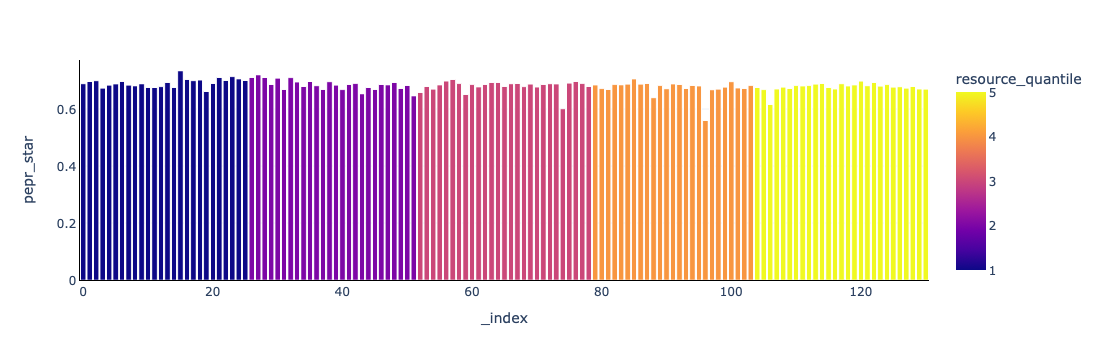

In [679]:
resource_df["resource_quantile"] = np.searchsorted(quantiles, resource_df[stratify_column].values, side="right")
px.bar(resource_df.sort_values(stratify_column).reset_index(), y=value_column, color="resource_quantile")

In [680]:
import scipy.stats

In [681]:
quantile_dfs = list(resource_df.groupby("resource_quantile"))

In [682]:
quantile_indices = [resource_df["resource_quantile"] == k for k in resource_df["resource_quantile"].unique()]
values = resource_df[value_column]
groups = [values[idx] for idx in quantile_indices]
scipy.stats.kruskal(*groups)

KruskalResult(statistic=16.802672488649428, pvalue=0.0021112303197416984)

In [683]:
means = {k: df[value_column].mean() for k, df in quantile_dfs}
medians = {k: df[value_column].median() for k, df in quantile_dfs}
stds = {k: df[value_column].std() for k, df in quantile_dfs}
p_values = {}
for i, df_i in quantile_dfs:
    for j, df_j in quantile_dfs[(i+1):]:
        stat = scipy.stats.kruskal(df_i[value_column], df_j[value_column])
        p_values[(i, j)] = stat.pvalue
medians, stds, {k: p for k, p in p_values.items() if p < 0.05}

({1: 0.6916451381196477,
  2: 0.6849709015632794,
  3: 0.6865336635010237,
  4: 0.6816132185539053,
  5: 0.6790905937628102},
 {1: 0.015197626373401212,
  2: 0.017969496991762854,
  3: 0.01959701417636202,
  4: 0.026909898339580383,
  5: 0.014309472234200472},
 {(1, 3): 0.04252649385678788,
  (1, 4): 0.0011149892617775194,
  (1, 5): 0.00048688805215751257,
  (3, 5): 0.03190115591797094})

In [ ]:
##

In [490]:
pca = sklearn.decomposition.PCA()
pca_profile = pca.fit_transform(peak_profile_time)
pca.mean_, pca.explained_variance_ratio_

(array([0.67145946, 0.67231504, 0.67317062, ..., 0.72799869, 0.72799913,
        0.72799957]),
 array([9.08545684e-01, 6.46045249e-02, 1.42737910e-02, 5.29648230e-03,
        2.85395610e-03, 1.18078263e-03, 8.60931271e-04, 5.44728941e-04,
        4.94737550e-04, 3.17956975e-04, 2.58947936e-04, 1.41061368e-04,
        1.08778631e-04, 1.03218647e-04, 8.37087362e-05, 7.35432359e-05,
        5.74536235e-05, 3.94136353e-05, 3.15300882e-05, 2.41353115e-05,
        2.02262770e-05, 1.47136864e-05, 1.12344672e-05, 9.25414525e-06,
        7.63053548e-06, 5.46507533e-06, 4.36987037e-06, 4.13554442e-06,
        3.80461346e-06, 3.13638946e-06, 2.91222564e-06, 2.79324795e-06,
        2.47823013e-06, 1.54887065e-06, 1.44187591e-06, 1.22357295e-06,
        9.60772921e-07, 9.21352317e-07, 7.02280202e-07, 6.71059138e-07,
        5.55862259e-07, 5.07468137e-07, 4.42944559e-07, 3.18232548e-07,
        2.78295864e-07, 2.35246192e-07, 2.17471152e-07, 2.01851609e-07,
        1.85627064e-07, 1.66232513e-07, 1

In [401]:
# np.corrcoef(test_profile, rowvar=False)

In [402]:
# np.std(test_profile, axis=1)

/Users/bob/venv/python3.11/lib/python3.11/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



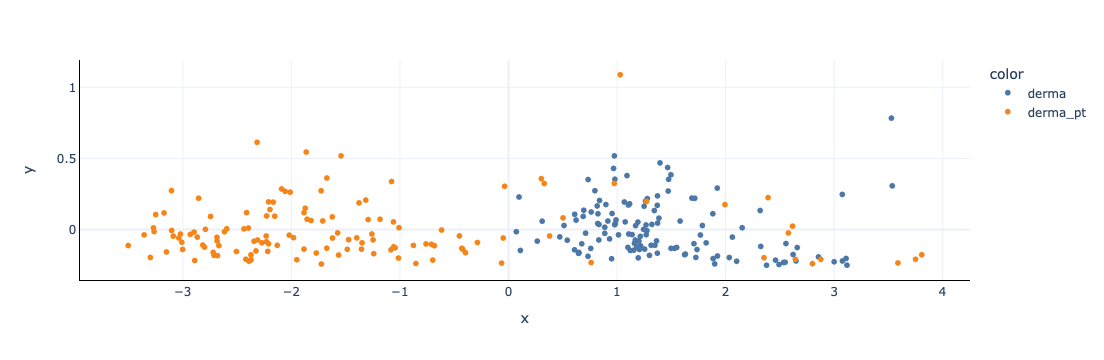

In [403]:
px.scatter(x=pca_profile[:, 0], y=pca_profile[:, 1], hover_name=df["label"], opacity=1.0, color=df["dataset"], color_continuous_scale="RdBu")

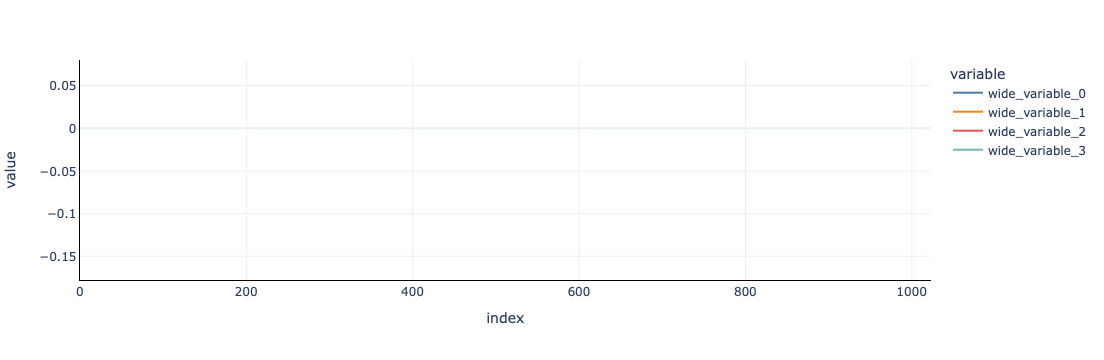

In [404]:
px.line(y=[pca.components_[i] for i in range(4)])